In [4]:
# Importing Libraries
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import joblib
import warnings
warnings.filterwarnings('ignore')

# Natural Language Processing Libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, LSTM, Bidirectional, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Scikit-Learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Visualization Libraries
import plotly.express as px


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
#reading files content

df = pd.read_csv('Phishing_Email.csv')

In [22]:
df.head(10)

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,5,global risk management operations sally congra...,Safe Email
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,9,re : coastal deal - with exxon participation u...,Safe Email


In [23]:
#drop extra column

df.drop(columns='Unnamed: 0', inplace=True)
df.head(10)

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,global risk management operations sally congra...,Safe Email
6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,re : coastal deal - with exxon participation u...,Safe Email


In [24]:
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (18650, 2)


In [25]:
# checking the duplicates

df.duplicated().sum()

1111

In [26]:
# removing the duplicates

df = df.drop_duplicates()
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (17539, 2)


In [27]:
df.isnull().sum()

Email Text    1
Email Type    0
dtype: int64

In [28]:
df.dropna(inplace=True,axis=0)
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (17538, 2)


In [29]:
#removing alphanumeric characters

df['Email Text'] = df['Email Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

df.head()

,Email Text,Email Type
0,re disc uniformitarianism re sex la...,Safe Email
1,the other side of galicismos galicismo is ...,Safe Email
2,re equistar deal tickets are you still availa...,Safe Email
3,\nHello I am your hot lil horny toy\n I am ...,Phishing Email
4,software at incredibly low prices lower d...,Phishing Email


In [30]:
#removing words like i, am, this, that etc...

stop = stopwords.words('english')
df["Email Text"] = df['Email Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df.head()

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,Safe Email
1,side galicismos galicismo spanish term names i...,Safe Email
2,equistar deal tickets still available assist r...,Safe Email
3,Hello I hot lil horny toy I one dream About I ...,Phishing Email
4,software incredibly low prices lower drapery s...,Phishing Email


In [31]:
#convert all data to lowercase

df['Email Text'] = df['Email Text'].str.lower()
df.head()

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,Safe Email
1,side galicismos galicismo spanish term names i...,Safe Email
2,equistar deal tickets still available assist r...,Safe Email
3,hello i hot lil horny toy i one dream about i ...,Phishing Email
4,software incredibly low prices lower drapery s...,Phishing Email


In [32]:
#removing numbers

df['Email Text'] = df['Email Text'].str.replace(r'\d+', '', regex=True)
df.head()

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,Safe Email
1,side galicismos galicismo spanish term names i...,Safe Email
2,equistar deal tickets still available assist r...,Safe Email
3,hello i hot lil horny toy i one dream about i ...,Phishing Email
4,software incredibly low prices lower drapery s...,Phishing Email


In [33]:
#removing white spaces

df['Email Text'] = df['Email Text'].str.replace(r'\s+', ' ', regex=True)
df.head()

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,Safe Email
1,side galicismos galicismo spanish term names i...,Safe Email
2,equistar deal tickets still available assist r...,Safe Email
3,hello i hot lil horny toy i one dream about i ...,Phishing Email
4,software incredibly low prices lower drapery s...,Phishing Email


In [34]:
#removing special charcter

df['Email Text'] = df['Email Text'].str.replace(r'[^\w\s]', '', regex=True)
df.head()

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,Safe Email
1,side galicismos galicismo spanish term names i...,Safe Email
2,equistar deal tickets still available assist r...,Safe Email
3,hello i hot lil horny toy i one dream about i ...,Phishing Email
4,software incredibly low prices lower drapery s...,Phishing Email


In [35]:
#removing urls if any

df['Email Text'] = df['Email Text'].str.replace(r'http\S+', '', regex=True)
df.head()

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,Safe Email
1,side galicismos galicismo spanish term names i...,Safe Email
2,equistar deal tickets still available assist r...,Safe Email
3,hello i hot lil horny toy i one dream about i ...,Phishing Email
4,software incredibly low prices lower drapery s...,Phishing Email


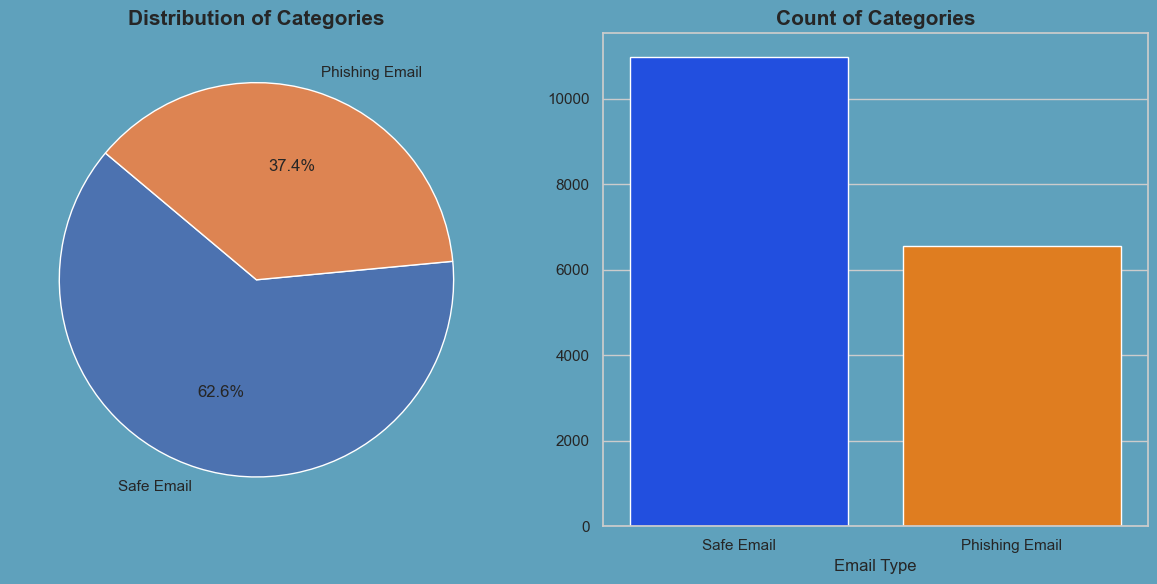

In [36]:
# Value count of 'label'
count = df['Email Type'].value_counts()

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color, 'figure.facecolor': background_color})

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor=background_color)

# Plot pie chart on the first subplot
palette = sns.color_palette("bright", len(count))
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories', fontsize=15, fontweight='bold')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette=palette)
axs[1].set_title('Count of Categories', fontsize=15, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
#label encoding for the Email Type Column
le = LabelEncoder()
df["Email Type"] = le.fit_transform(df["Email Type"])

In [38]:
df.head()

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,1
1,side galicismos galicismo spanish term names i...,1
2,equistar deal tickets still available assist r...,1
3,hello i hot lil horny toy i one dream about i ...,0
4,software incredibly low prices lower drapery s...,0


**LSTM (Emails)**

In [39]:
max_len = 150

tk = Tokenizer()

# Process the text

tk.fit_on_texts(df['Email Text'])
sequences = tk.texts_to_sequences(df['Email Text'])
vector = pad_sequences(sequences,padding='post', maxlen=max_len)

In [40]:
len(vector)

17538

In [41]:
x = np.array(vector)
y = np.array(df["Email Type"])

In [42]:
#Split the dataset into train and test set

x_train, x_test, y_train, y_test = train_test_split(vector,df['Email Type'], test_size=0.2, random_state =0)

In [43]:
model = Sequential() # Sequential() API
model.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model.add(LSTM(units=100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [45]:
historical  = model.fit(x_train,y_train, epochs=5, batch_size=16, validation_data=(x_test,y_test))

Epoch 1/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 74s 82ms/step - accuracy: 0.6411 - loss: 0.6332 - val_accuracy: 0.6383 - val_loss: 0.5154
Epoch 2/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 73s 83ms/step - accuracy: 0.9104 - loss: 0.2679 - val_accuracy: 0.9507 - val_loss: 0.1909
Epoch 3/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 76s 86ms/step - accuracy: 0.9548 - loss: 0.1761 - val_accuracy: 0.9347 - val_loss: 0.1967
Epoch 4/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 77s 88ms/step - accuracy: 0.9649 - loss: 0.1163 - val_accuracy: 0.9712 - val_loss: 0.0913
Epoch 5/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 79s 90ms/step - accuracy: 0.9843 - loss: 0.0483 - val_accuracy: 0.9783 - val_loss: 0.0806


In [46]:
results = model.evaluate(x_test, y_test)
accuracy = results[1]

print(f"Model Accuracy: {accuracy*100}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9790 - loss: 0.0748
Model Accuracy: 97.83352613449097


In [49]:
# Predictions On Test For Confustion Matrix 
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Threshold to convert to binary output (0 or 1)

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


<Figure size 600x500 with 0 Axes>

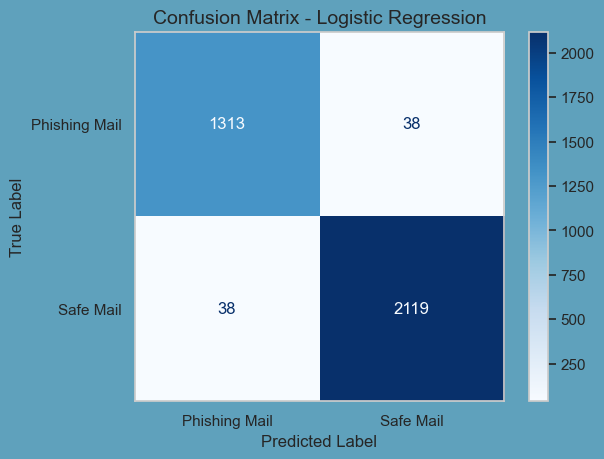

In [50]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Phishing Mail', 'Safe Mail'])

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d') 
plt.title("Confusion Matrix - Logistic Regression", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.grid(False)  # Remove grid for cleaner look
plt.show()

In [51]:
# Save both the model and the TF-IDF vectorizer to a pickle file
with open('email_phishing_model_tfidf.pkl', 'wb') as f:
    pickle.dump((tk, model), f)

In [53]:
model.save("email_lstm_model.h5")